# Initialize

In [1]:
%cd ".."

/leonardo_scratch/fast/INF24_pmlhep_1/rtorre00/projects/JetNetMetrics


/leonardo/home/userexternal/rtorre00/fast/rtorre00/envs/tf2_custom/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
visible_devices = [0]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing textwrap...")
import textwrap
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.plotters import plot_corners, cornerplotter, plot_corr_matrix, plot_corr_matrix_side_by_side # type: ignore
from GMetrics.more.deformations import deformed_distribution, deform_mean, deform_cov_diag, deform_cov_off_diag, deform_power_abs, deform_random
from GMetrics.more.optimizers_deformations import compute_exclusion_bisection_dataset # type: ignore
from GMetrics.utils import se_mean, se_std

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
import jetnet

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
        
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-09-09 15:12:29.181087: Importing os...
2024-09-09 15:12:29.181251: Importing sys...
Visible devices: [0]
2024-09-09 15:12:29.181488: Importing timer from timeit...
2024-09-09 15:12:29.181560: Setting env variables for tf import (only device(s) [0] will be available)...
2024-09-09 15:12:29.181689: Importing numpy...
2024-09-09 15:12:29.299180: Importing matplotlib...
2024-09-09 15:12:29.680175: Importing h5py...
2024-09-09 15:12:29.706864: Importing importlib.util...
2024-09-09 15:12:29.706981: Importing json...
2024-09-09 15:12:29.707045: Importing pandas...
2024-09-09 15:12:30.362612: Importing random...
2024-09-09 15:12:30.362806: Importing scipy utils...
2024-09-09 15:12:31.114954: Importing subprocess...
2024-09-09 15:12:31.115129: Importing textwrap...
2024-09-09 15:12:31.115214: Importing tensorflow...
Tensorflow version: 2.16.1
2024-09-09 15:12:38.842519: Importing tensorflow_probability...
Tensorflow probability version: 0.24.0
2024-09-09 15:12:43.566951: Importing timeit.

/leonardo/home/userexternal/rtorre00/fast/rtorre00/envs/tf2_custom/lib/python3.11/site-packages/jetnet/utils/utils.py:7: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


2024-09-09 15:12:53.452777: Importing jetnet.evaluation.gen_metrics module...
Successfully loaded GPU #0, model: NVIDIA A100-SXM-64GB
Loaded 1 GPUs: ['NVIDIA A100-SXM-64GB']
2024-09-09 15:12:53.482516: All done.


# Load data

In [3]:
data = jetnet.datasets.JetNet.getData(jet_type = "g",
                                      data_dir = "data/g",
                                      particle_features = "all",
                                      jet_features = "all",
                                      num_particles = 30,
                                      split = "all",
                                      split_fraction = None,
                                      seed = 42,
                                      download = False,
                                     )

In [4]:
def get_particle_features(relative_features,
                          jet_features):
    eta_rel = relative_features[:, :, 0]
    phi_rel = relative_features[:, :, 1]
    pt_rel = relative_features[:, :, 2]
    mask = relative_features[:, :, 3]
    eta_jet = jet_features[:, 2]
    pt_jet = jet_features[:, 1]
    eta_particle = eta_jet[:, None] + eta_rel
    phi_paericle = phi_rel
    pt_particle = pt_jet[:, None] * pt_rel
    particle_features = tf.stack([eta_particle, phi_paericle, pt_particle, mask], axis = 2)
    return particle_features

In [5]:
relative_features = tf.cast(data[0], tf.float64)                            #    ``["etarel", "phirel", "ptrel", "mask"]``.
jet_features = tf.cast(data[1], tf.float64)                                 #    ``["type", "pt", "eta", "mass", "num_particles"]``.
particle_features = get_particle_features(relative_features, jet_features)  #    ``["eta", "phi", "pt", "mask"]``.
print(f"relative_features.shape: {relative_features.shape}")
print(f"jet_features.shape: {jet_features.shape}")
print(f"particle_features.shape: {particle_features.shape}")

relative_features.shape: (177252, 30, 4)
jet_features.shape: (177252, 5)
particle_features.shape: (177252, 30, 4)


# Particle level

## Init data

In [6]:
results_dir = "results/particle_features_30/"
figures_dir = os.path.join(results_dir, "figures/")
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)
    print("Results directories waere created")

In [7]:
def preprocess_data(data,means,stds):
    preprocess_data=(data-means)/stds
    return preprocess_data

def postprocess_data(data,means,stds):
    postprocess_data=data*stds+means
    return postprocess_data

def get_reduced_particle_features(particle_features):
    tmp = particle_features[:, :, :3]
    shape = tmp.shape
    particle_features_reshaped = tf.reshape(tmp, [-1, shape[1] * shape[2]])
    return particle_features_reshaped

particle_features_reduced = get_reduced_particle_features(particle_features)
particle_features_reduced.shape

TensorShape([177252, 90])

## Plots

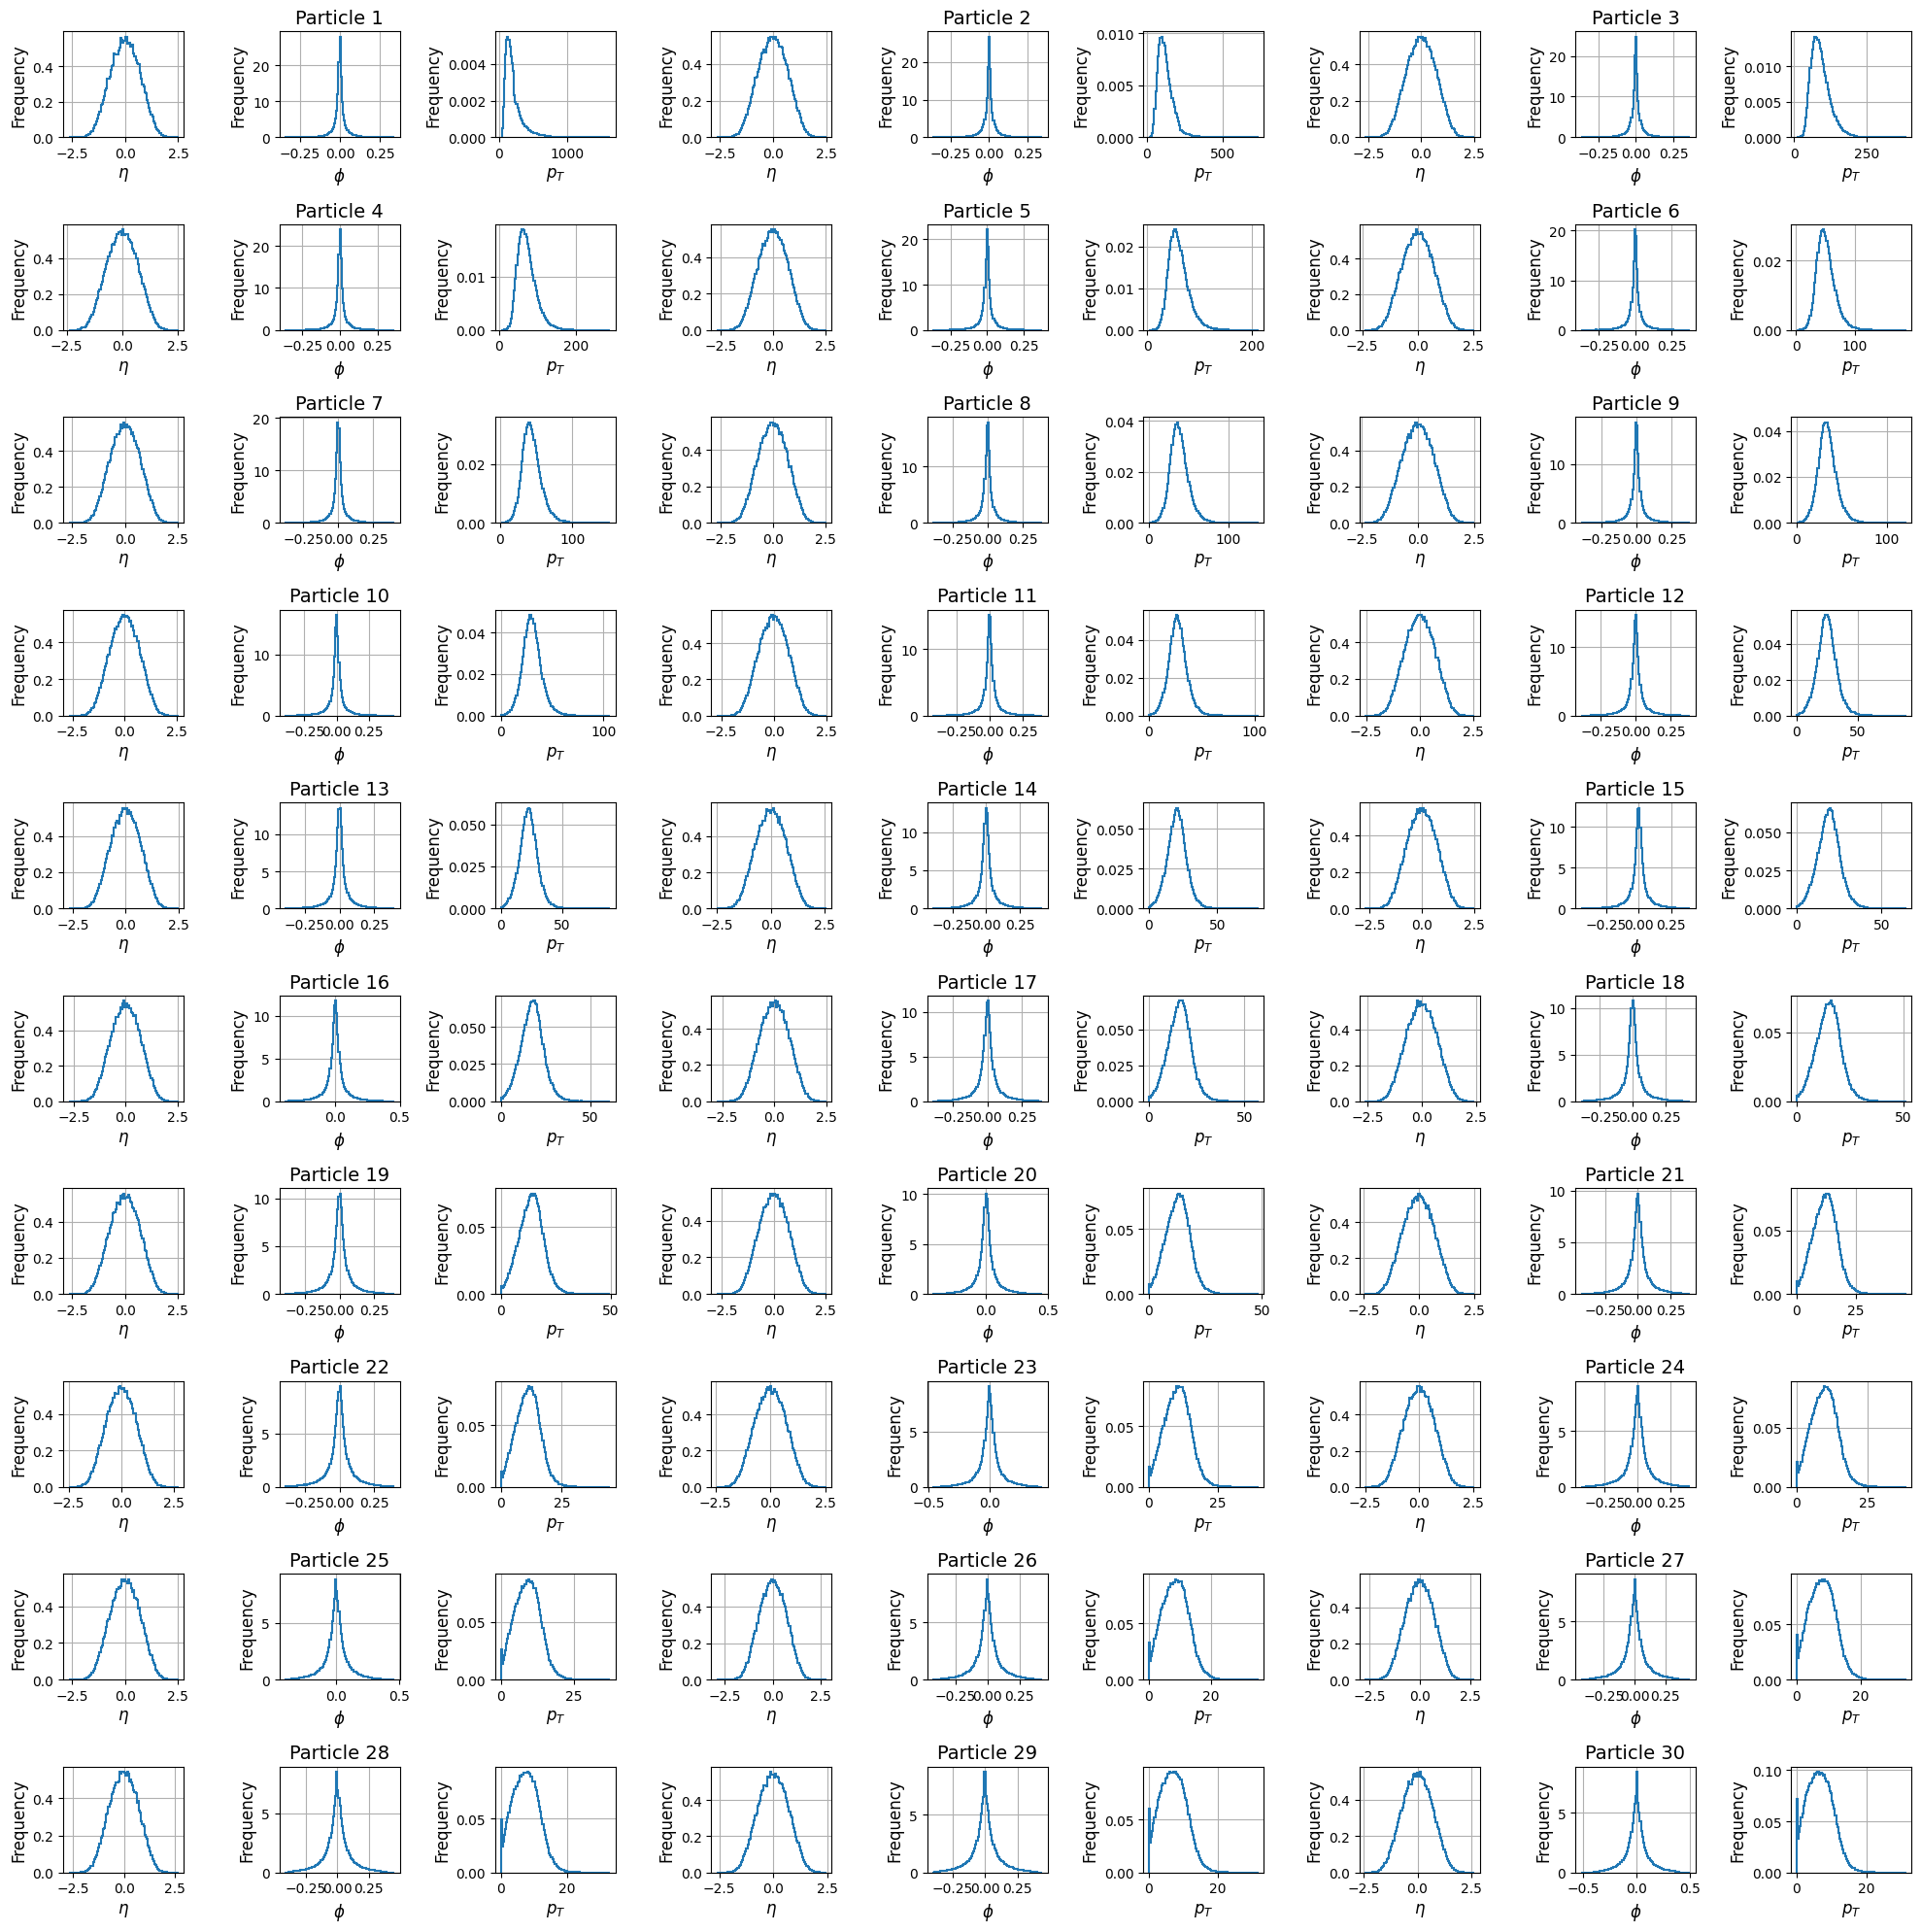

In [8]:
names = [r"$\eta$", r"$\phi$", r"$p_{T}$"] * particle_features.shape[1]
#titles = [["\#"+str(i+1),"\#"+str(i+1),"\#"+str(i+1)] for i in range(particle_features.shape[1])]
titles = [["","Particle "+str(i+1),""] for i in range(particle_features.shape[1])]
titles = [item for sublist in titles for item in sublist]

# Set a consistent style
#plt.style.use('GMetrics/more/matplotlib.mplstyle')

# Create a figure with 4 subplots (10 rows, 9 columns)
fig, axs = plt.subplots(10, 9, figsize=(20, 20))

# Flatten the axes array for easy iteration
axs = axs.flatten()

for i in range(particle_features_reduced.numpy().shape[1]):
    name = names[i]
    axs[i].hist(particle_features_reduced.numpy()[:, i], bins=100, density=True, histtype='step', linewidth=1.5)
    axs[i].set_title(titles[i], fontsize=14)
    axs[i].set_xlabel(name, fontsize=12)
    axs[i].set_ylabel('Frequency', fontsize=12)
    axs[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [9]:
mean = tf.reduce_mean(particle_features_reduced, axis=0)
std = tf.math.reduce_std(particle_features_reduced, axis=0)

eps_mu = 0.5
eps_sigma = 0.2
eps_sigma_off_diag = 0.2
eps_power_plus = 0.1
eps_power_minus = 0.1
eps_shift_normal = 0.2
eps_shift_uniform = 0.2

preprocessed_particle_features_reduced = preprocess_data(particle_features_reduced, mean, std)
deformed1 = deform_mean(preprocessed_particle_features_reduced,
                        eps = eps_mu,
                        seed = 0)
deformed2 = deform_cov_diag(preprocessed_particle_features_reduced,
                            eps = eps_sigma,
                            seed = 0)
deformed3 = deform_cov_off_diag(preprocessed_particle_features_reduced,
                                eps = eps_sigma_off_diag,
                                seed = 0)
deformed4 = deform_power_abs(preprocessed_particle_features_reduced,
                             eps = eps_power_plus,
                             direction = "up")
deformed5 = deform_power_abs(preprocessed_particle_features_reduced,
                             eps = eps_power_minus,
                             direction = "down")
deformed6 = deform_random(preprocessed_particle_features_reduced,
                          eps = eps_shift_normal,
                          shift_dist = "normal",
                          seed = 0)
deformed7 = deform_random(preprocessed_particle_features_reduced,
                          eps = eps_shift_uniform,
                          shift_dist = "uniform",
                          seed = 0)
particle_features_deform1_reduced = postprocess_data(deformed1, mean, std)
particle_features_deform2_reduced = postprocess_data(deformed2, mean, std)
particle_features_deform3_reduced = postprocess_data(deformed3, mean, std)
particle_features_deform4_reduced = postprocess_data(deformed4, mean, std)
particle_features_deform5_reduced = postprocess_data(deformed5, mean, std)
particle_features_deform6_reduced = postprocess_data(deformed6, mean, std)
particle_features_deform7_reduced = postprocess_data(deformed7, mean, std)

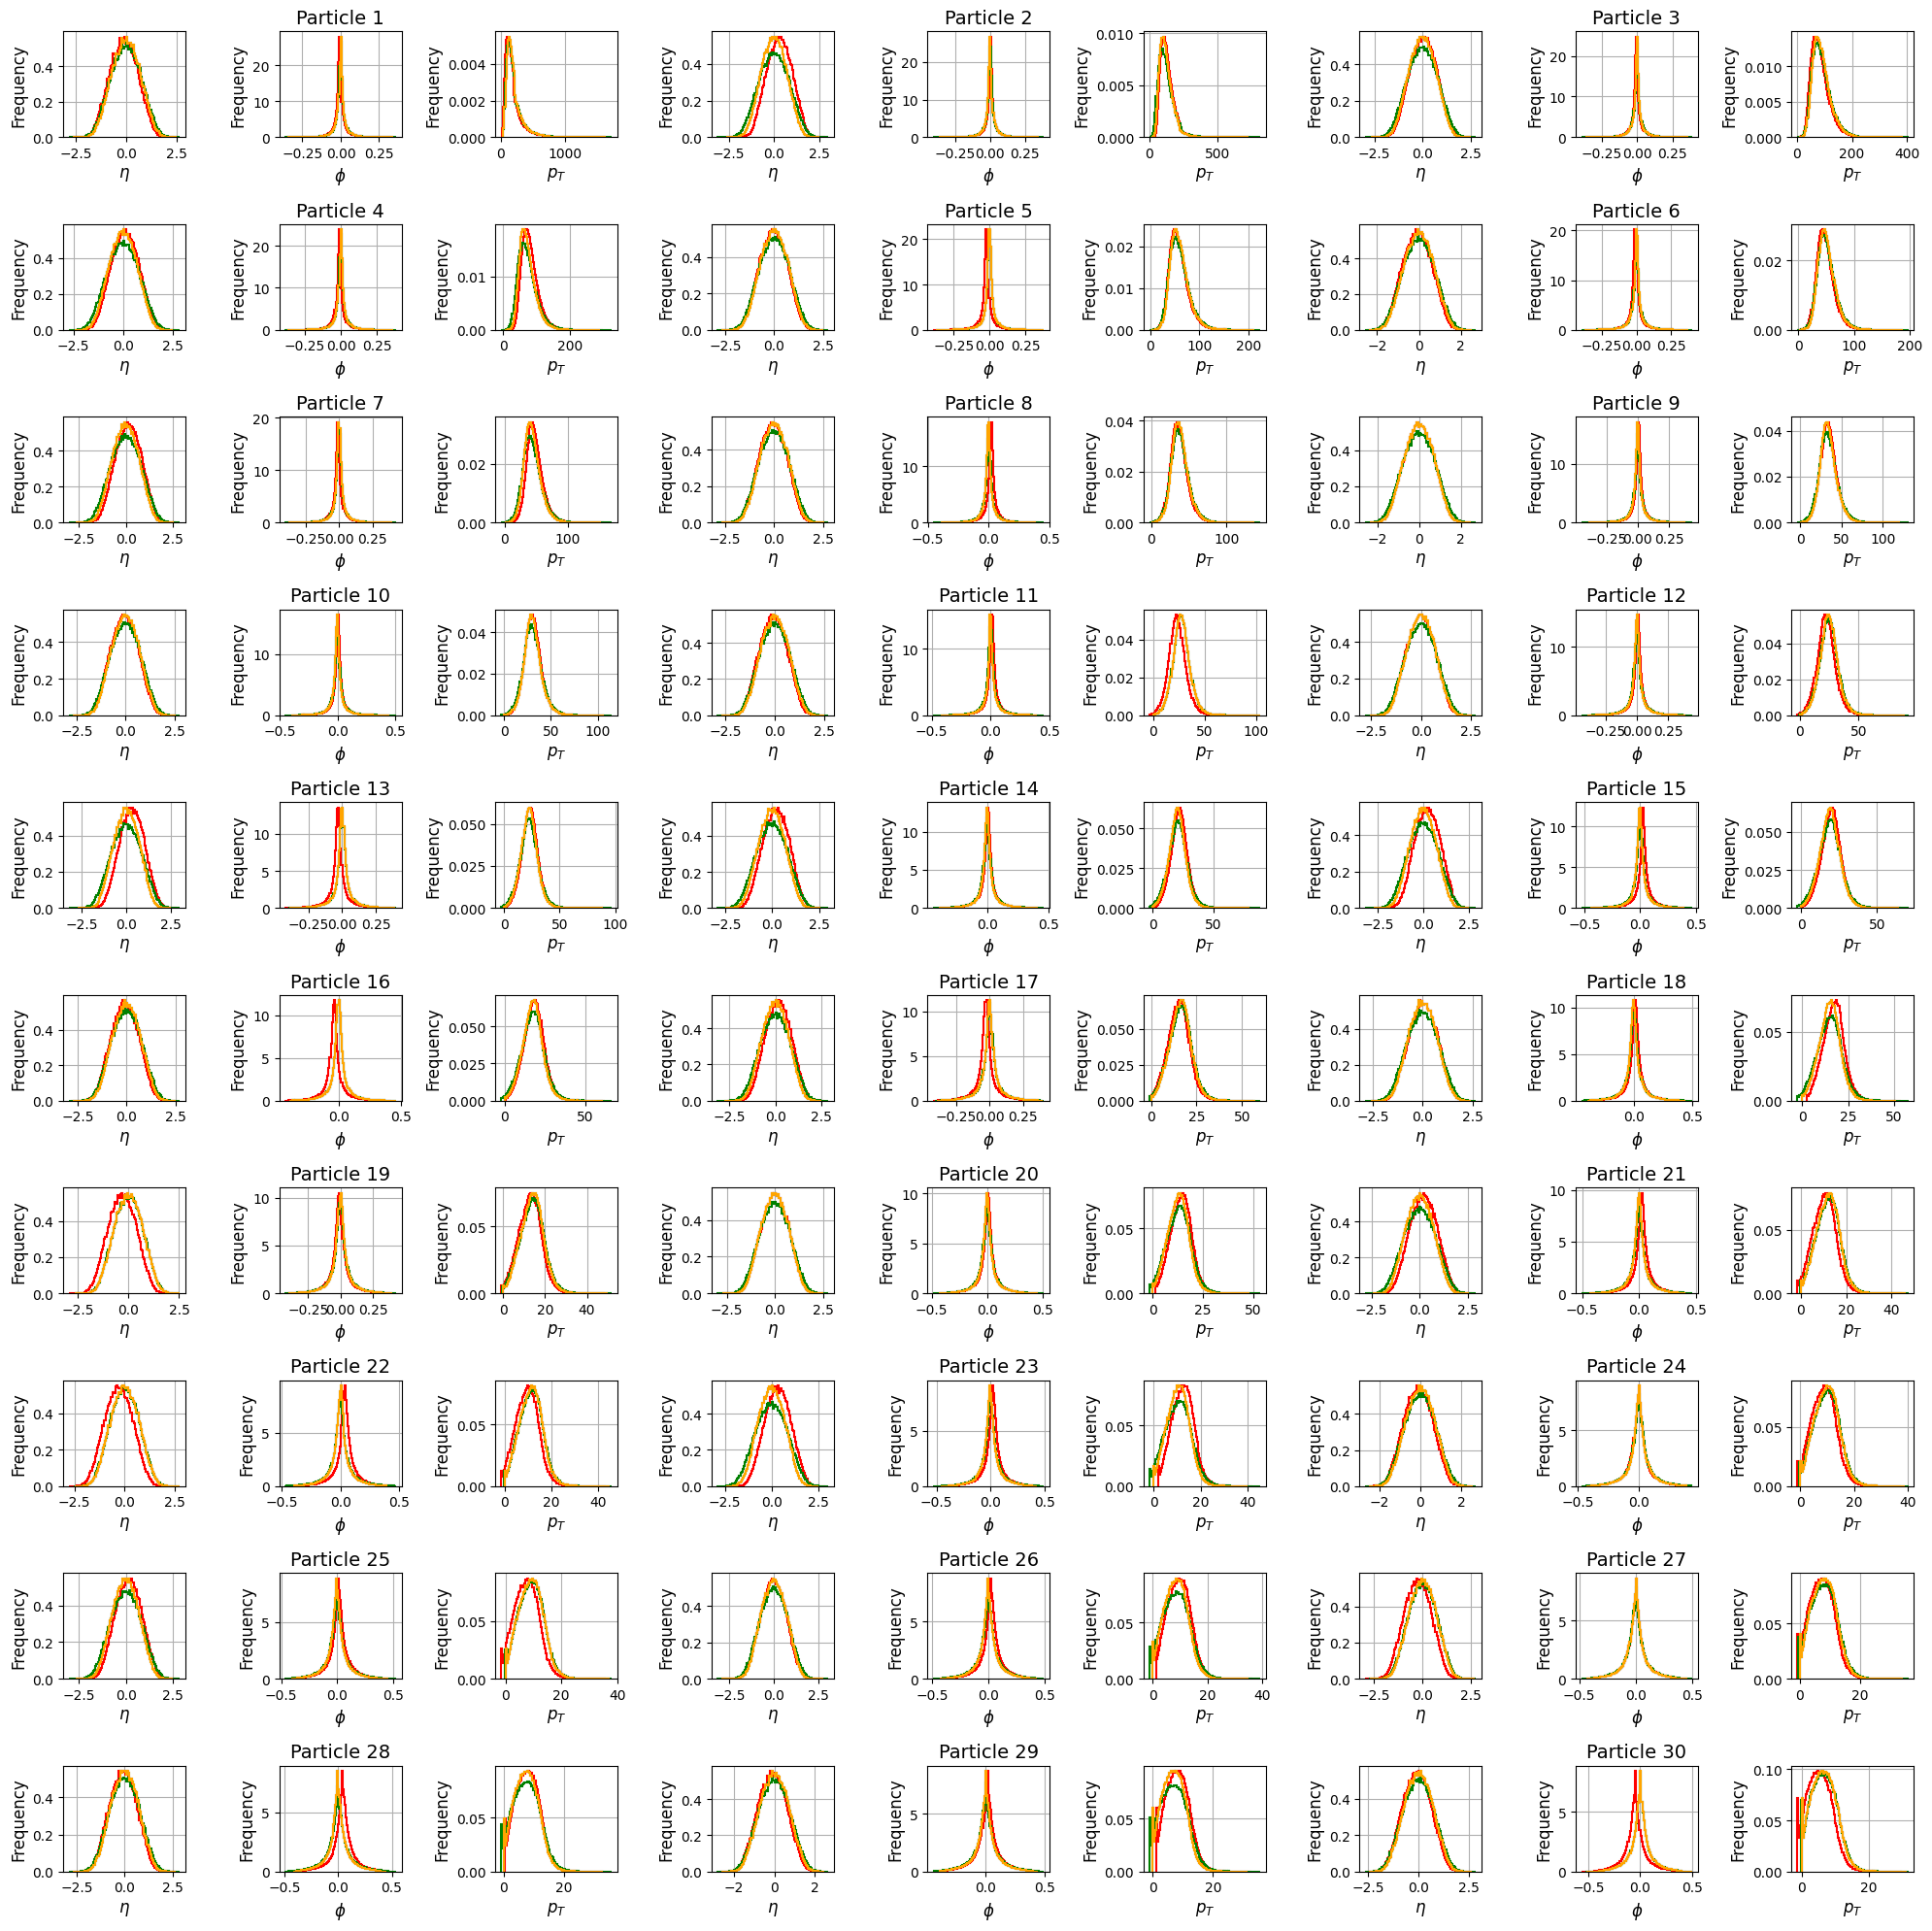

In [10]:
names = [r"$\eta$", r"$\phi$", r"$p_{T}$"] * particle_features.shape[1]
#titles = [["\#"+str(i+1),"\#"+str(i+1),"\#"+str(i+1)] for i in range(particle_features.shape[1])]
titles = [["","Particle "+str(i+1),""] for i in range(particle_features.shape[1])]
titles = [item for sublist in titles for item in sublist]

# Set a consistent style
#plt.style.use('GMetrics/more/matplotlib.mplstyle')

# Create a figure with 4 subplots (10 rows, 9 columns)
fig, axs = plt.subplots(10, 9, figsize=(20, 20))

# Flatten the axes array for easy iteration
axs = axs.flatten()

for i in range(particle_features_reduced.numpy().shape[1]):
    name = names[i]
    axs[i].hist(particle_features_reduced.numpy()[:, i], bins=100, density=True, histtype='step', linewidth=1.5)
    axs[i].hist(particle_features_deform1_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='red', label='$\mu$-deformation $\epsilon='+str(eps_mu)+'$')
    axs[i].hist(particle_features_deform2_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='green', label='$\Sigma_{ij}$-deformation $\epsilon='+str(eps_sigma)+'$')
    axs[i].hist(particle_features_deform3_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='orange', label='$\Sigma_{i\\neq j}$-deformation-deformation $\epsilon='+str(eps_sigma_off_diag)+'$')
    axs[i].set_title(titles[i], fontsize=14)
    axs[i].set_xlabel(name, fontsize=12)
    axs[i].set_ylabel('Frequency', fontsize=12)
    axs[i].grid(True)
    #axs[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot
plt.savefig(figures_dir + "deformed_particle_features_1.png")

# Show the plot
plt.show()

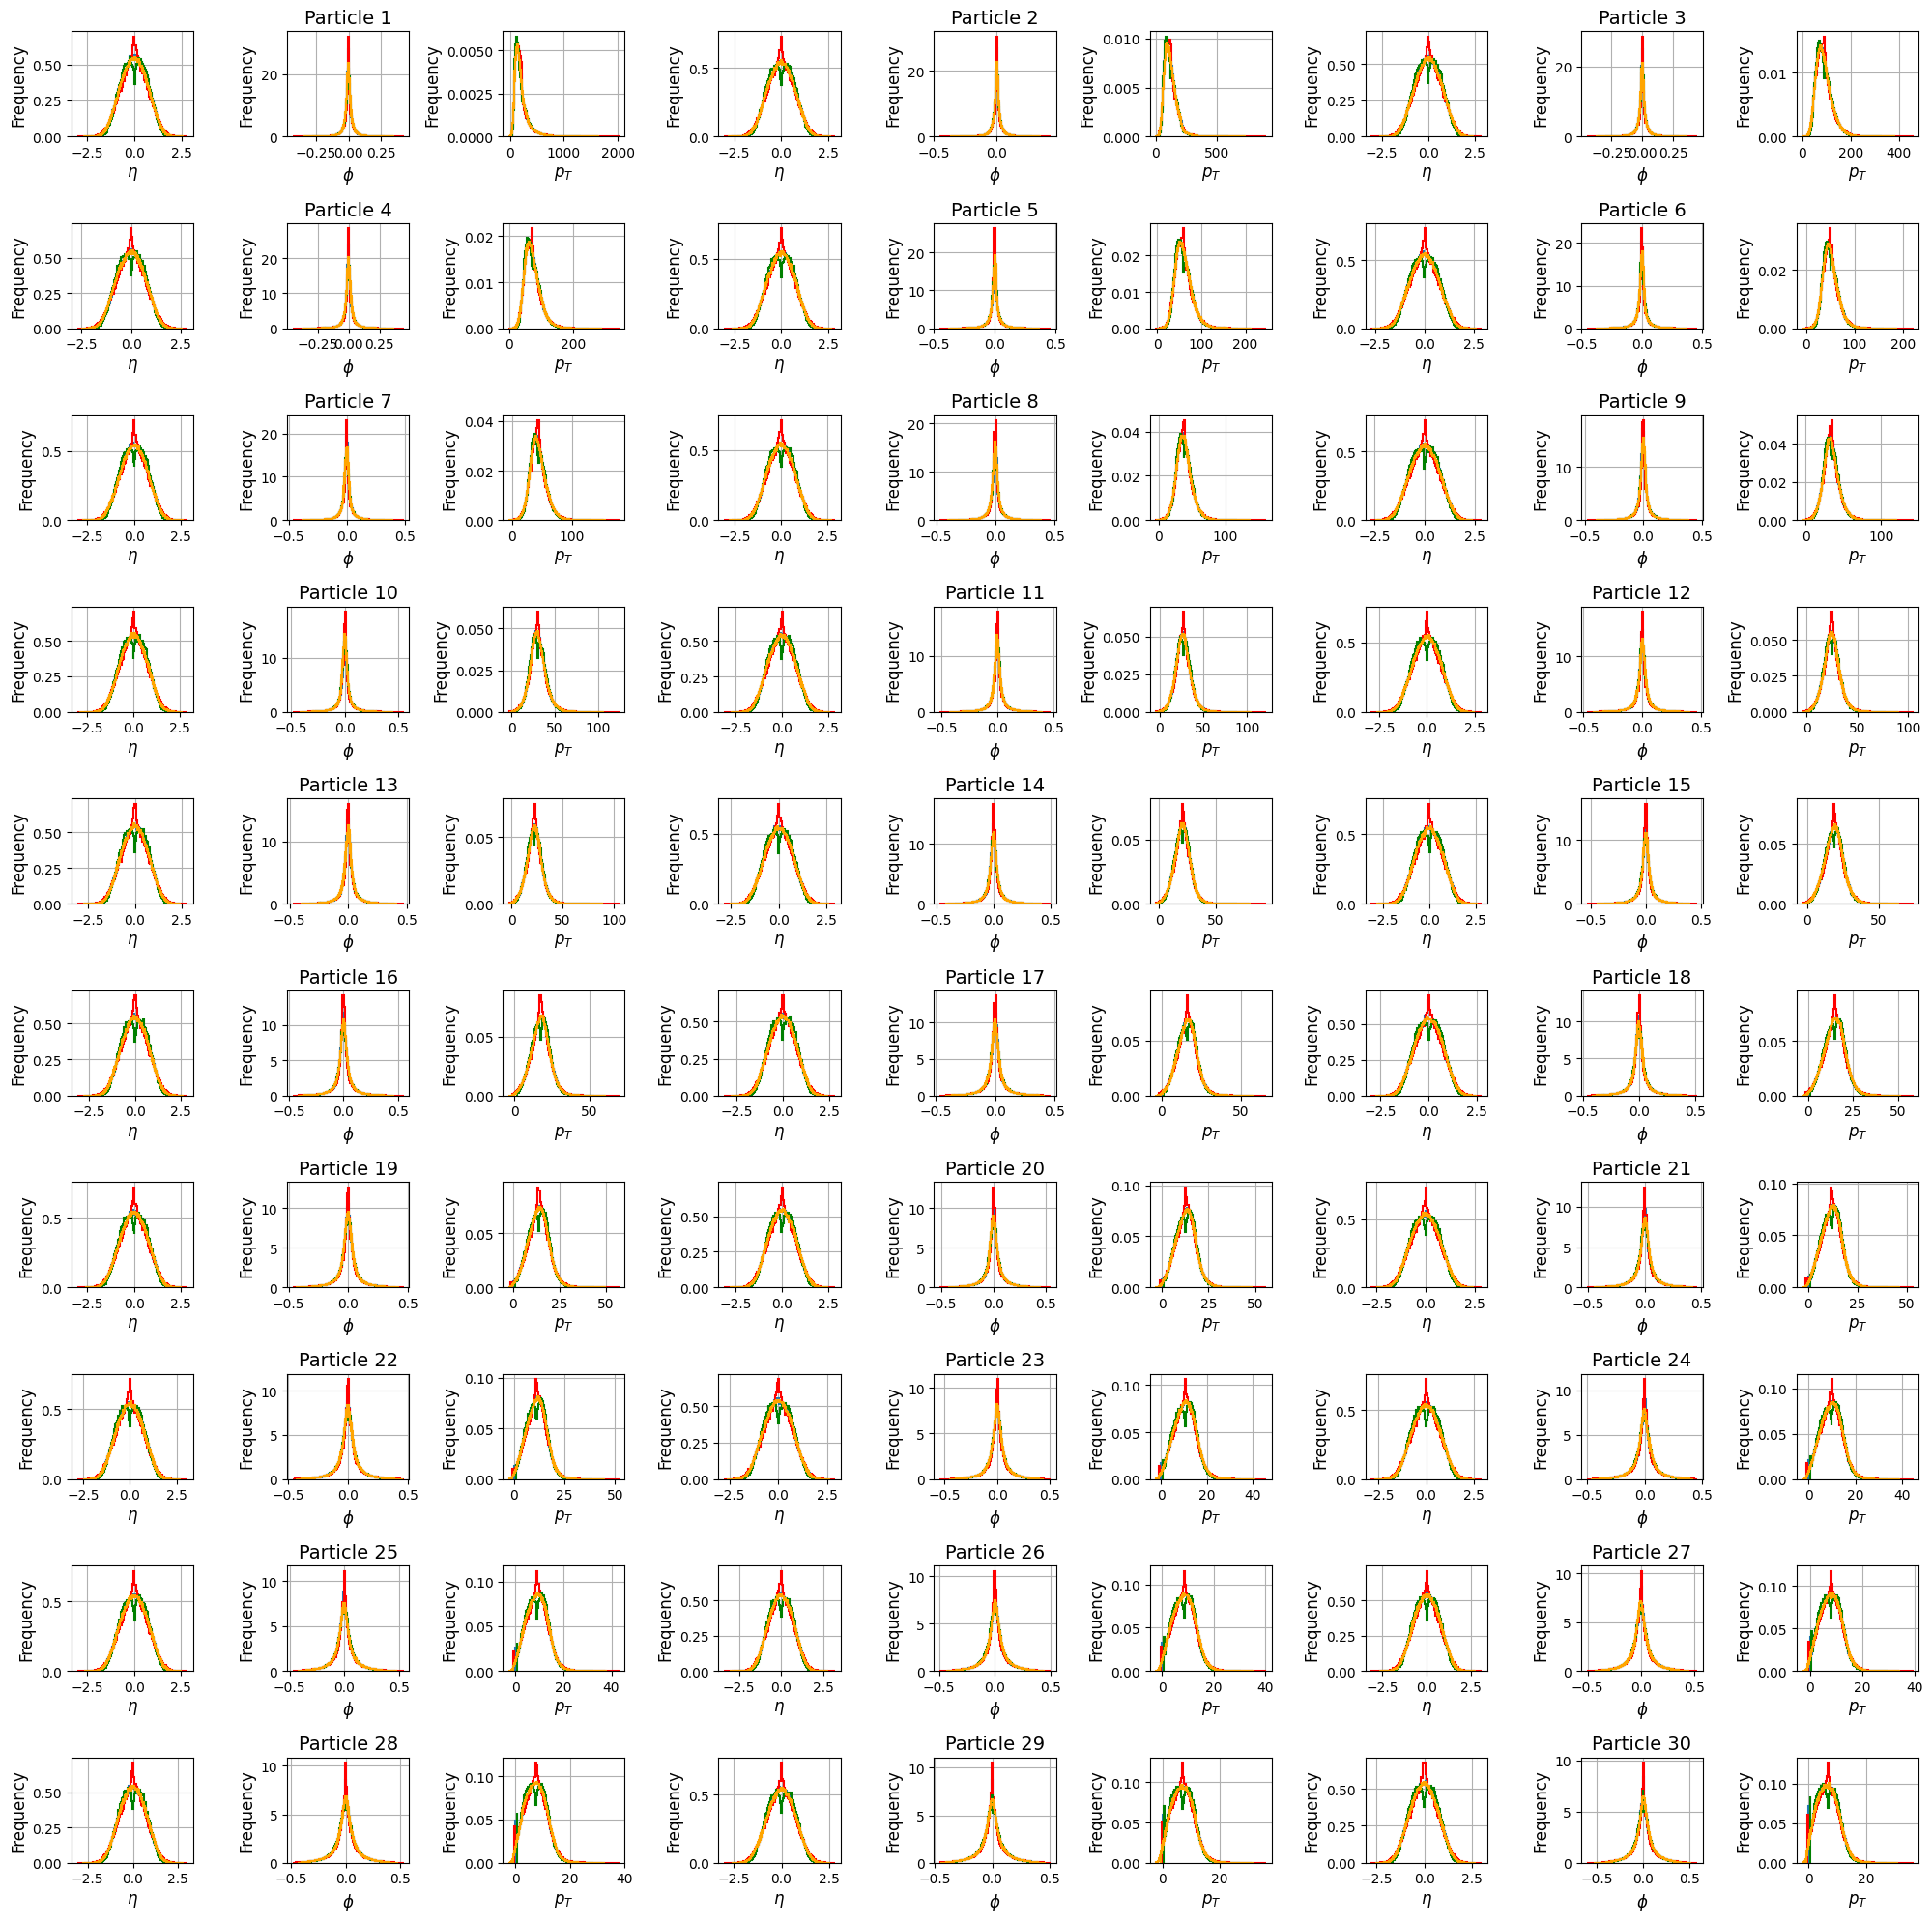

In [11]:
names = [r"$\eta$", r"$\phi$", r"$p_{T}$"] * particle_features.shape[1]
#titles = [["\#"+str(i+1),"\#"+str(i+1),"\#"+str(i+1)] for i in range(particle_features.shape[1])]
titles = [["","Particle "+str(i+1),""] for i in range(particle_features.shape[1])]
titles = [item for sublist in titles for item in sublist]

# Set a consistent style
#plt.style.use('GMetrics/more/matplotlib.mplstyle')

# Create a figure with 4 subplots (10 rows, 9 columns)
fig, axs = plt.subplots(10, 9, figsize=(20, 20))

# Flatten the axes array for easy iteration
axs = axs.flatten()

for i in range(particle_features_reduced.numpy().shape[1]):
    name = names[i]
    axs[i].hist(particle_features_reduced.numpy()[:, i], bins=100, density=True, histtype='step', linewidth=1.5)
    axs[i].hist(particle_features_deform4_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='red', label='$\#^{+}$-deformation $\epsilon='+str(eps_power_plus)+'$')
    axs[i].hist(particle_features_deform5_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='green', label='$\#^{-}$-deformation $\epsilon='+str(eps_power_minus)+'$')
    axs[i].hist(particle_features_deform6_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='orange', label='$\mathcal{N}$-deformation-deformation $\epsilon='+str(eps_shift_normal)+'$')
    axs[i].hist(particle_features_deform7_reduced.numpy()[:, i], bins=100, histtype='step', density=True, linewidth=1.5, color='orange', label='$\mathcal{U}$-deformation-deformation $\epsilon='+str(eps_shift_uniform)+'$')
    axs[i].set_title(titles[i], fontsize=14)
    axs[i].set_xlabel(name, fontsize=12)
    axs[i].set_ylabel('Frequency', fontsize=12)
    axs[i].grid(True)
    #axs[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot
plt.savefig(figures_dir + "deformed_particle_features_2.png")

# Show the plot
plt.show()

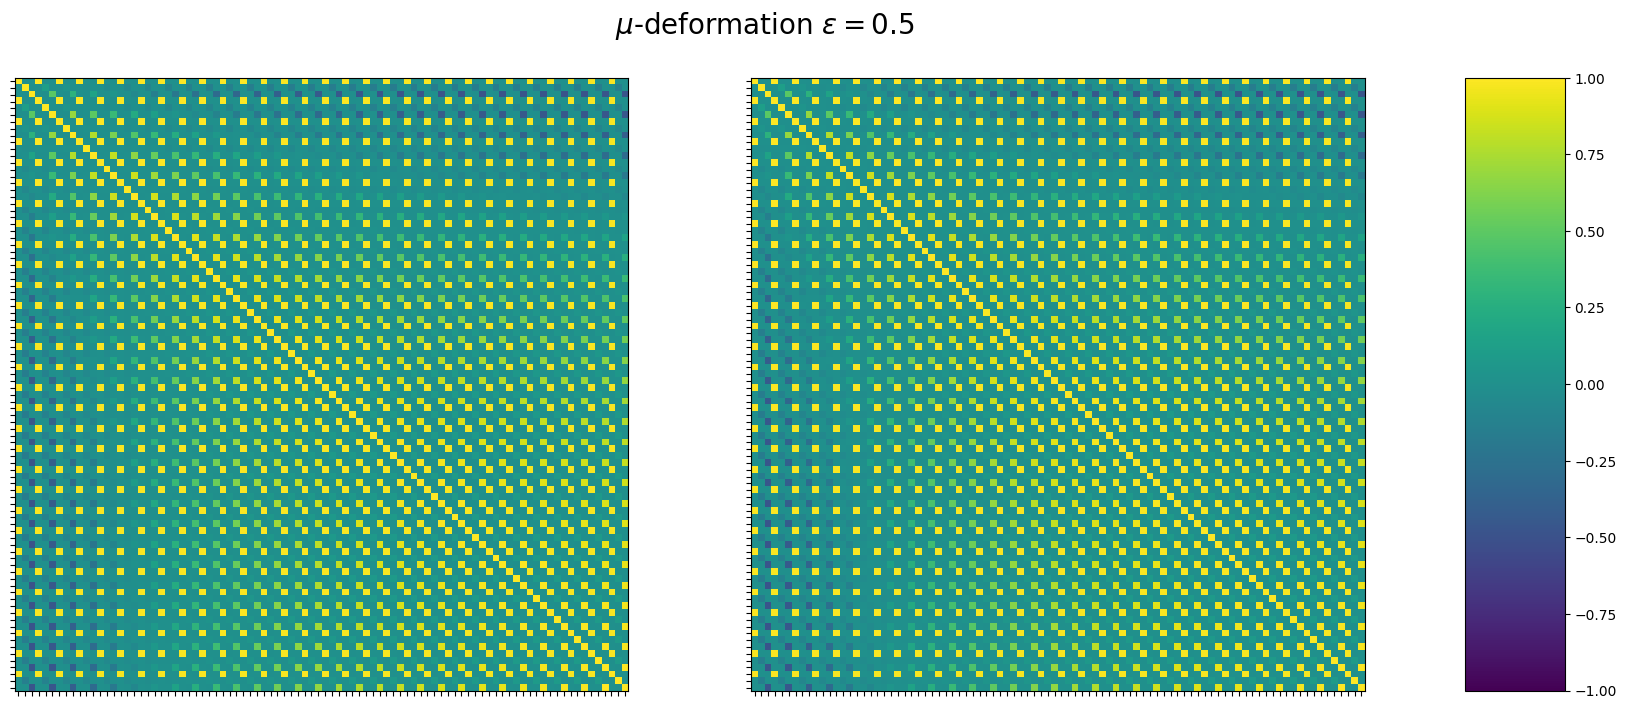

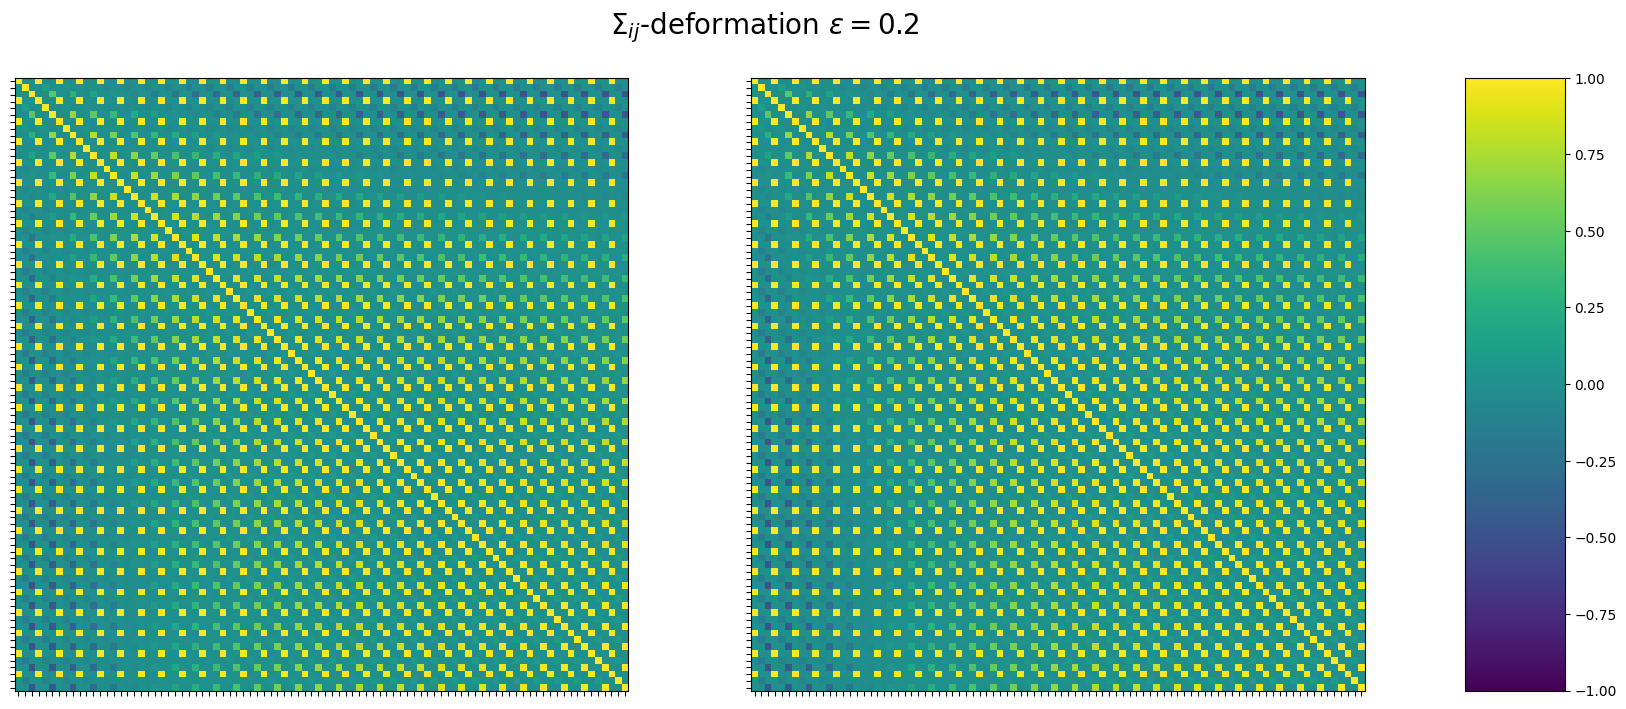

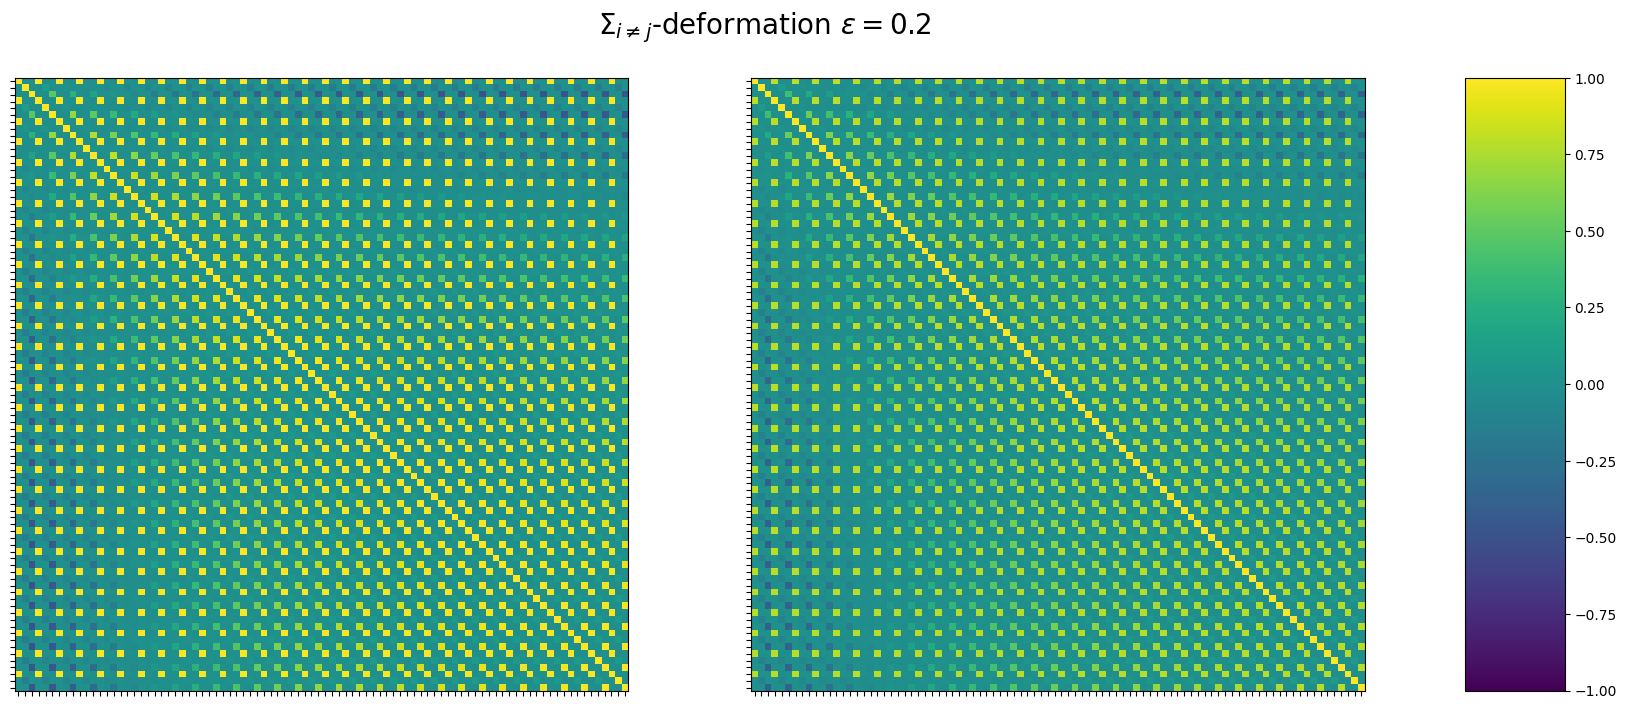

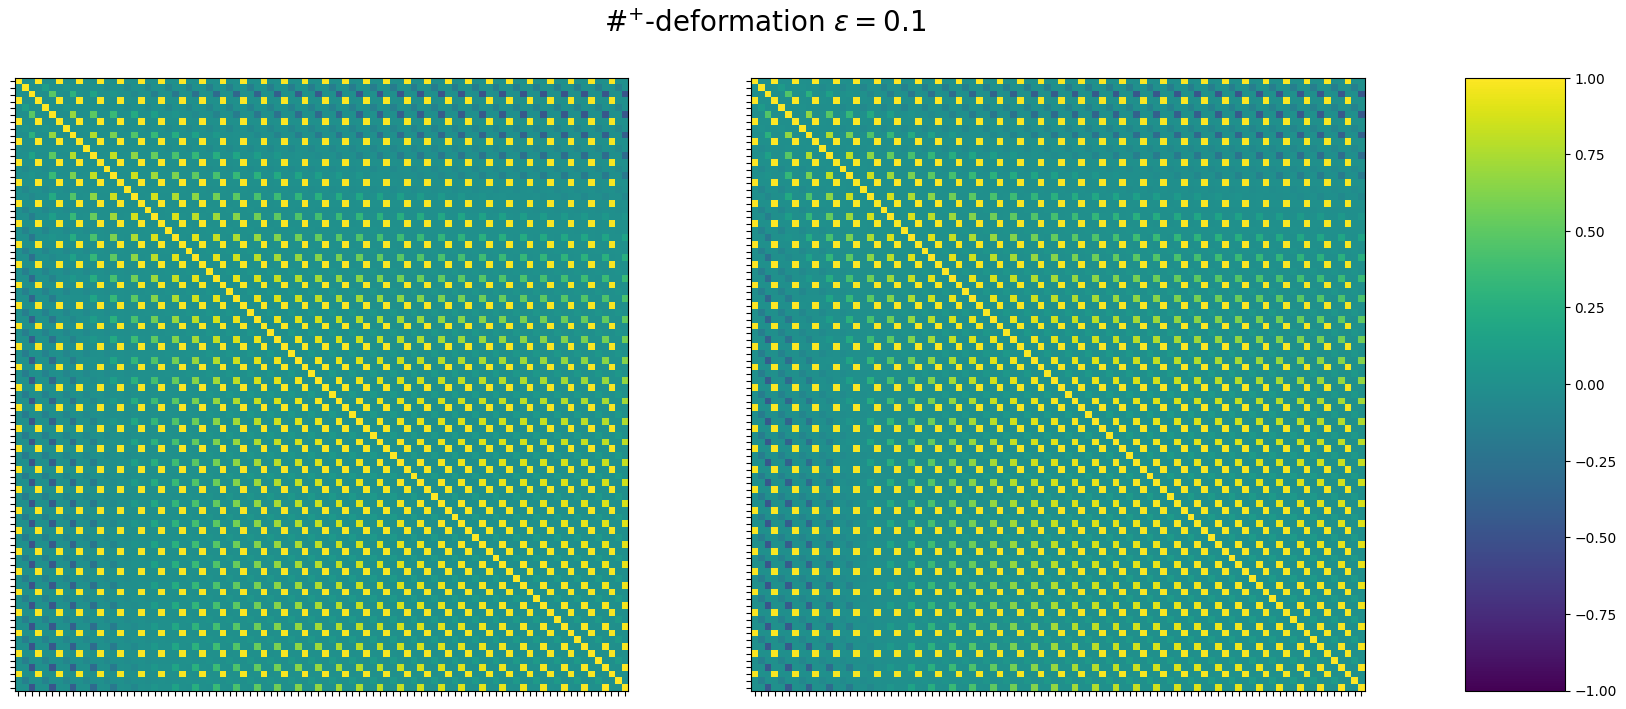

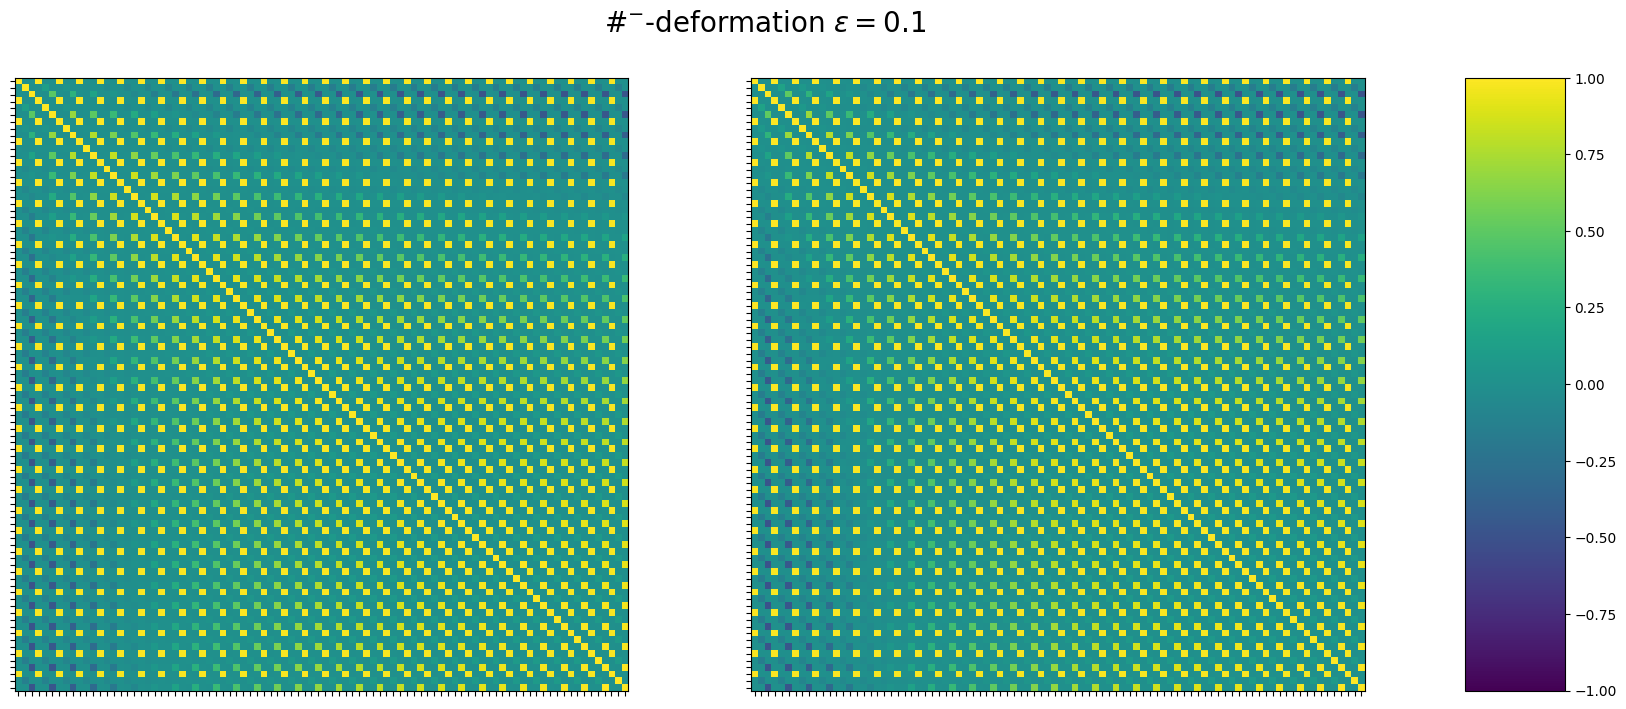

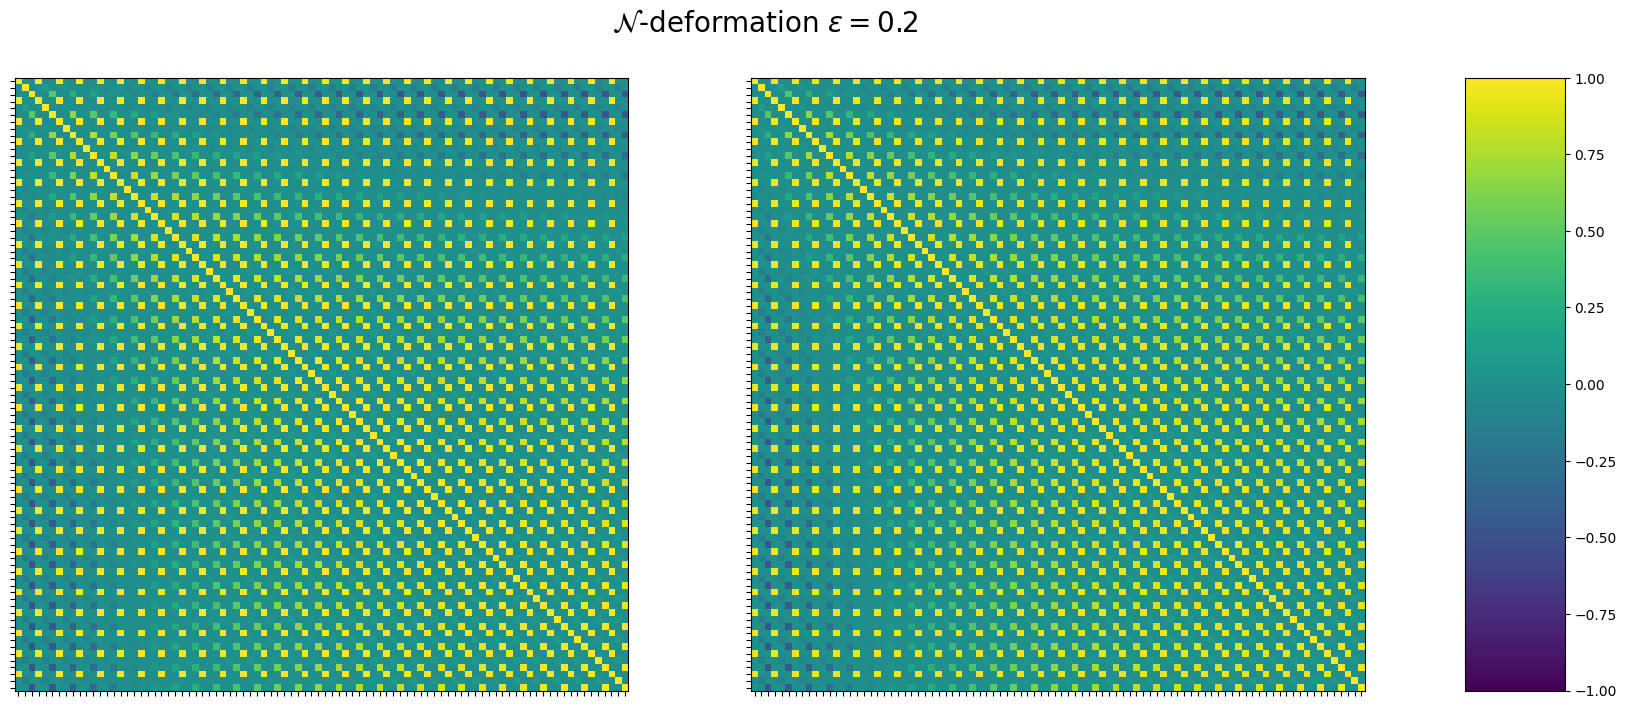

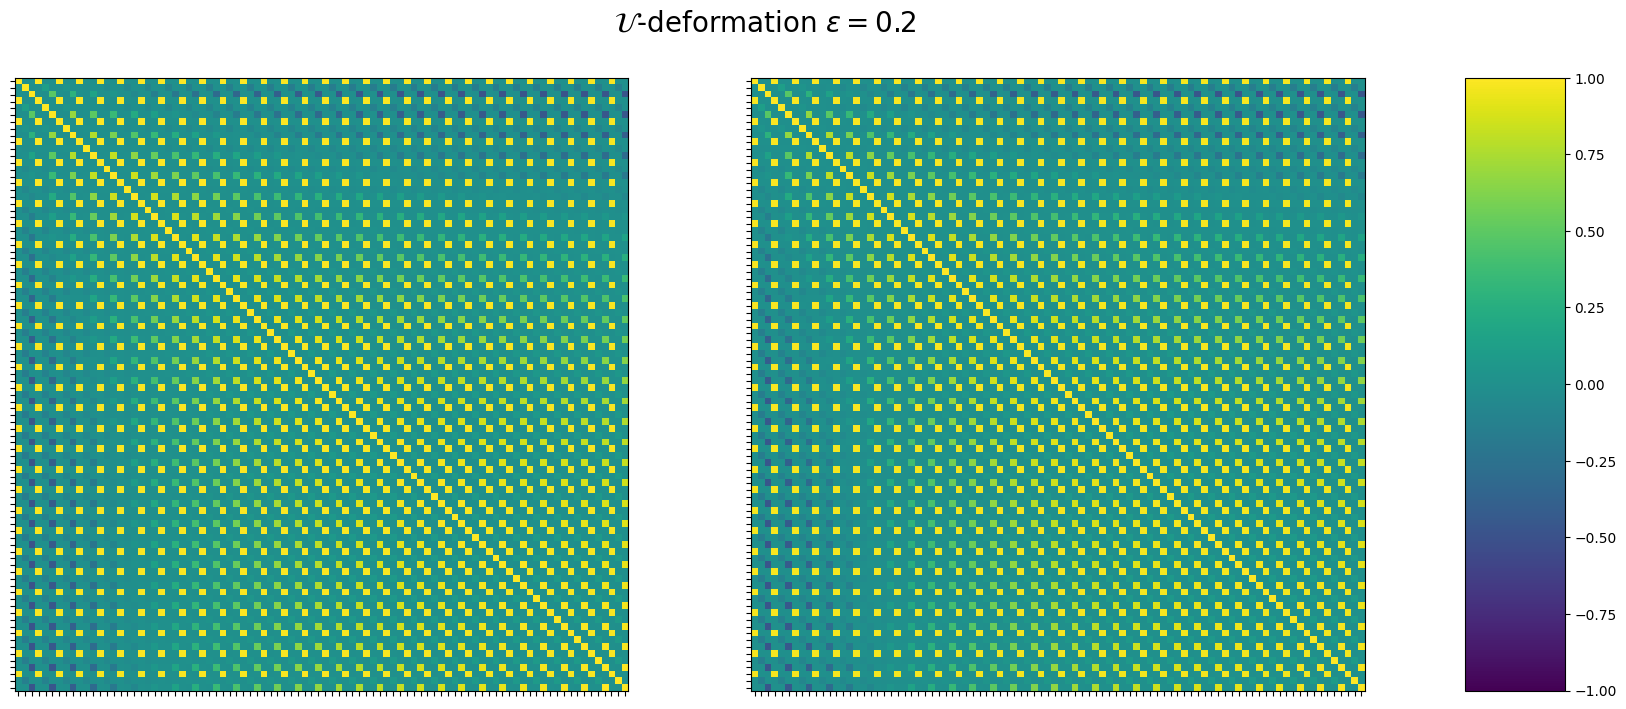

In [12]:
ds = [particle_features_deform1_reduced.numpy(),
      particle_features_deform2_reduced.numpy(),
      particle_features_deform3_reduced.numpy(),
      particle_features_deform4_reduced.numpy(),
      particle_features_deform5_reduced.numpy(),
      particle_features_deform6_reduced.numpy(),
      particle_features_deform7_reduced.numpy()]

plot_titles = [r"$\mu$-deformation $\epsilon="+str(eps_mu)+"$",
               r"$\Sigma_{ij}$-deformation $\epsilon="+str(eps_sigma)+"$",
               r"$\Sigma_{i\neq j}$-deformation $\epsilon="+str(eps_sigma_off_diag)+"$",
               r"$\#^{+}$-deformation $\epsilon="+str(eps_power_plus)+"$",
               r"$\#^{-}$-deformation $\epsilon="+str(eps_power_minus)+"$",
               r"$\mathcal{N}$-deformation $\epsilon="+str(eps_shift_normal)+"$",
               r"$\mathcal{U}$-deformation $\epsilon="+str(eps_shift_uniform)+"$"]

labels = [["p"+str(i+1)+r" $\eta$","p"+str(i+1)+r" $\phi$","p"+str(i+1)+r" $p_{T}$"] for i in range(particle_features.shape[1])]
labels = [item for sublist in labels for item in sublist]

for i in range(len(ds)):
    plot_corr_matrix_side_by_side(dist_1 = particle_features_reduced.numpy(), 
                                  dist_2 = ds[i],
                                  path_to_plots = figures_dir, 
                                  figure_name = "corre_matrix_plot_def_"+str(i+1)+".pdf",
                                  max_points = 1_000_000,
                                  title = plot_titles[i],
                                  labels = labels,
                                  show_labels = False,
                                  show = True,
                                  save = True)